# Outliers & Novelty Detection

Both outlier identification and novelty detection are commonly used techniques in the field of anomaly detection. Outliers may be defined as data points that exhibit substantial deviation from the remaining data within a given dataset. In other terms, these observations are situated at a considerable distance from the central cluster of other data points. Outliers may arise from a multitude of factors, including but not limited to mistakes in data collection, measurement noise, or really exceptional findings.

In preprocessing and machine learning, outliers are important for several reasons:

**Impact on Statistics:** Outliers can greatly affect summary statistics like mean and standard deviation. Since these statistics are often used to understand and process data, outliers can distort our perception of the underlying distribution.

**Algorithm Sensitivity:** Many machine learning algorithms, such as linear regression and k-means clustering, are sensitive to outliers. Outliers can influence the model's parameter estimation and result in suboptimal performance. For example, in linear regression, a single outlier with an extreme value could disproportionately affect the slope and intercept of the regression line.

**Model Generalization:** Outliers can negatively impact the generalization ability of machine learning models. Models that are trained on data with outliers might perform poorly on new, unseen data where outliers are absent. This is because the model has learned to give undue importance to the outliers during training.

**Robustness and Stability:** Removing or handling outliers appropriately can lead to more robust and stable models. Models that are less affected by outliers tend to perform better across different datasets and real-world scenarios.

**Feature Engineering:** Outliers can provide valuable insights about the data or the domain. In some cases, outliers might represent rare but significant events or anomalies that we want to detect or understand.

# Detecting and Visualizing Outliers

For this research, I have used the heart disease dataset on which I have been working recently. The methodology involves plotting the data by using box and strip plots and then using various methods to handle them. I have calculated number of observation after trimming outliers in order to give a better idea about how much rows are deleted after computation. 

### Loading the dataset and the required libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import zscore
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

In [13]:
df = pd.read_csv("C:/Users/Z/Desktop/Project/heart disease classification dataset.csv")
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [14]:
df.shape

(303, 15)

In [15]:
df = df.dropna()

### Visulazing the whole dataset to select target variables

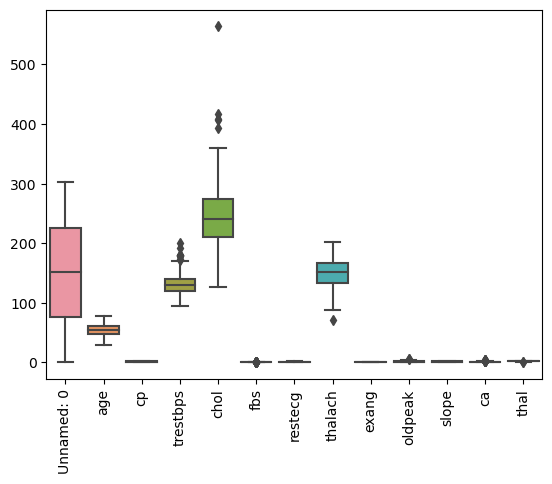

In [16]:
sns.boxplot(data=df)
plt.xticks(rotation=90) 
plt.show()

**It is clear that three variables required outlier handling ('trestbps', 'chol', and 'thalach') but if dataset has high dimensionality then we will loop through all the columns and adopt a suitable strategy to handle them, but here I am using three variables only just for elaboration purpose**.

### Box Plot

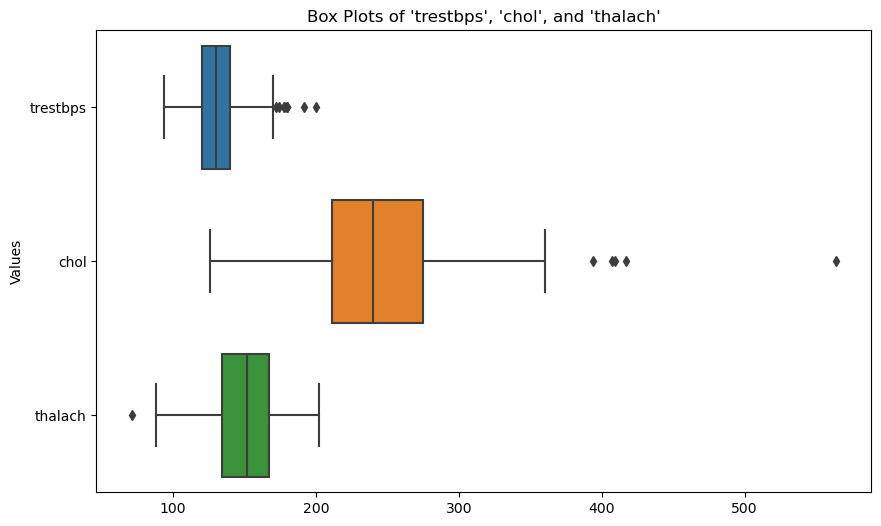

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['trestbps', 'chol', 'thalach']], orient='h')
plt.title("Box Plots of 'trestbps', 'chol', and 'thalach'")
plt.ylabel("Values")
plt.show()

### Strip Plot

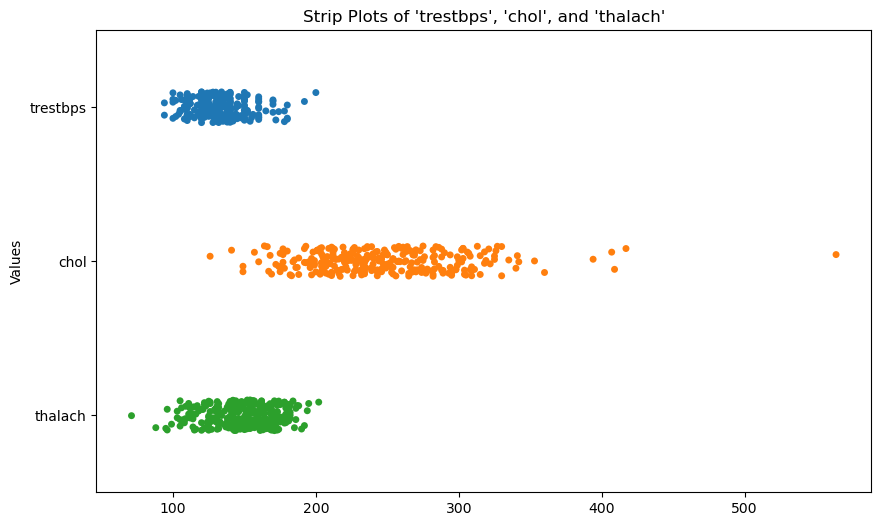

In [18]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=df[['trestbps', 'chol', 'thalach']], orient='h', jitter=True)
plt.title("Strip Plots of 'trestbps', 'chol', and 'thalach'")
plt.ylabel("Values")
plt.show()

### Analyzing the distribution

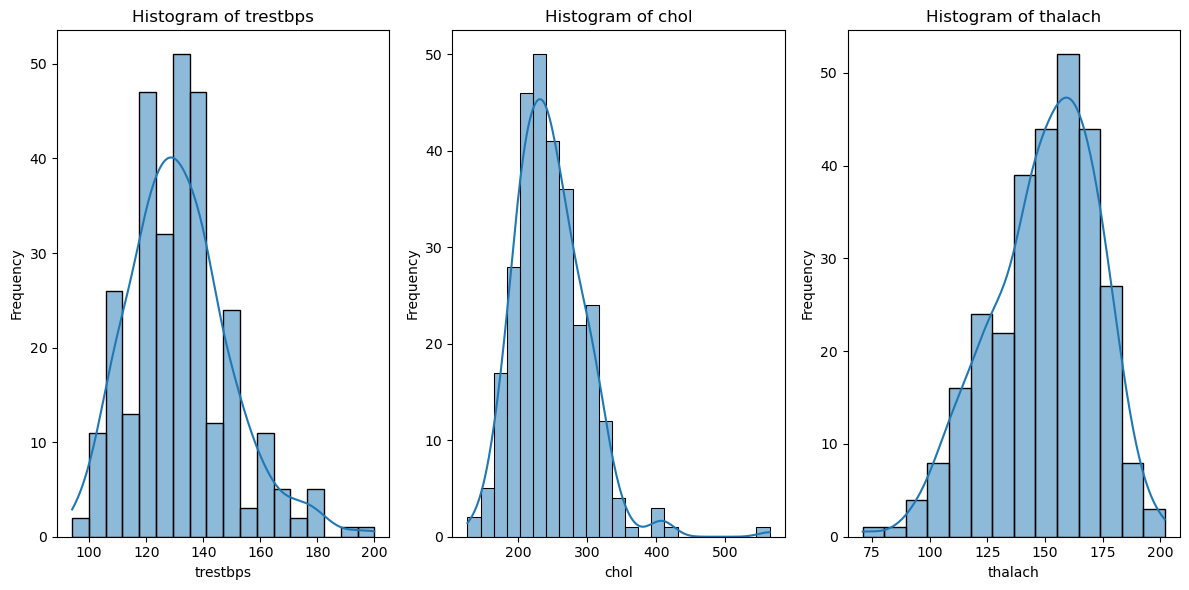

In [19]:
columns_to_check = ['trestbps', 'chol', 'thalach']
plt.figure(figsize=(12, 6))
for idx, column in enumerate(columns_to_check, 1):
    plt.subplot(1, len(columns_to_check), idx)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Handling Outliers

### Method 1: Inter-Quartile Range (IQR)

The IQR (Interquartile Range) technique is often used in the identification and elimination of outliers within one-dimensional data. This approach is particularly useful in situations involving univariate datasets or when addressing outliers within each individual feature independently. However, the effectiveness and simplicity of the IQR approach diminishes as the data's complexity grows.


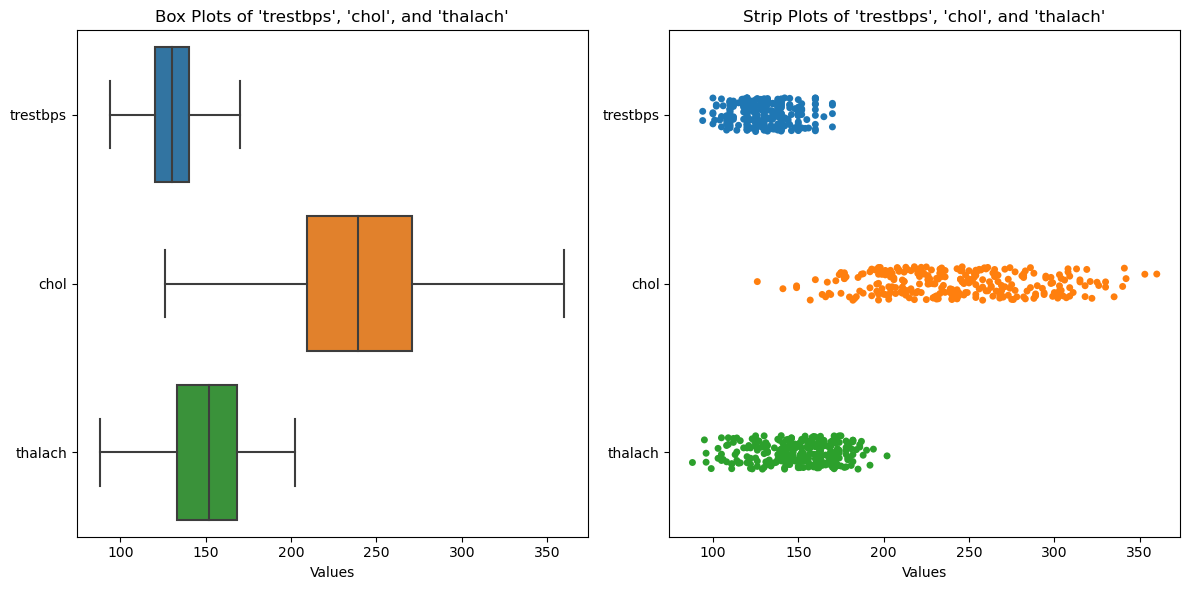

In [20]:
def remove_outliers_iqr(data, column, lower_bound=0.25, upper_bound=0.75):
    q1 = data[column].quantile(lower_bound)
    q3 = data[column].quantile(upper_bound)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

df_iqr = df.copy()
for column in columns_to_check:
    df_iqr = remove_outliers_iqr(df_iqr, column)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df_iqr[columns_to_check], orient='h')
plt.title("Box Plots of 'trestbps', 'chol', and 'thalach'")
plt.xlabel("Values")

plt.subplot(1, 2, 2)
sns.stripplot(data=df_iqr[columns_to_check], orient='h', jitter=True)
plt.title("Strip Plots of 'trestbps', 'chol', and 'thalach'")
plt.xlabel("Values")

plt.tight_layout()
plt.show()


In [21]:
df_iqr.shape

(278, 15)

### Method 2: IsolationForest

Random forests may be used as an effective method for detecting outliers in datasets with large dimensions.


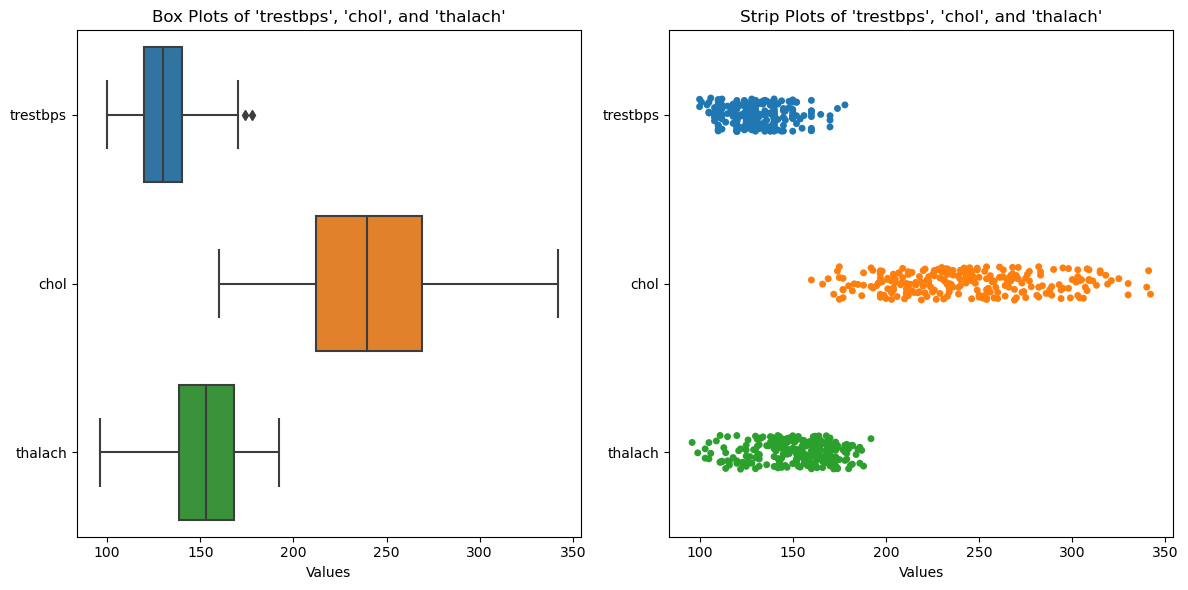

In [22]:
iso_forest = IsolationForest(contamination='auto', random_state=42)

outliers_isf = iso_forest.fit_predict(df[columns_to_check])

df_isf = df[outliers_isf == 1]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df_isf[columns_to_check], orient='h')
plt.title("Box Plots of 'trestbps', 'chol', and 'thalach'")
plt.xlabel("Values")

plt.subplot(1, 2, 2)
sns.stripplot(data=df_isf[columns_to_check], orient='h', jitter=True)
plt.title("Strip Plots of 'trestbps', 'chol', and 'thalach'")
plt.xlabel("Values")

plt.tight_layout()
plt.show()


In [23]:
df_isf.shape

(252, 15)

### Method 3: Standard Deviation & Trimming

The Standard Deviation & Trimming method is commonly used to detect and remove outliers from univariate datasets with relatively symmetric and approximately normally distributed data. 

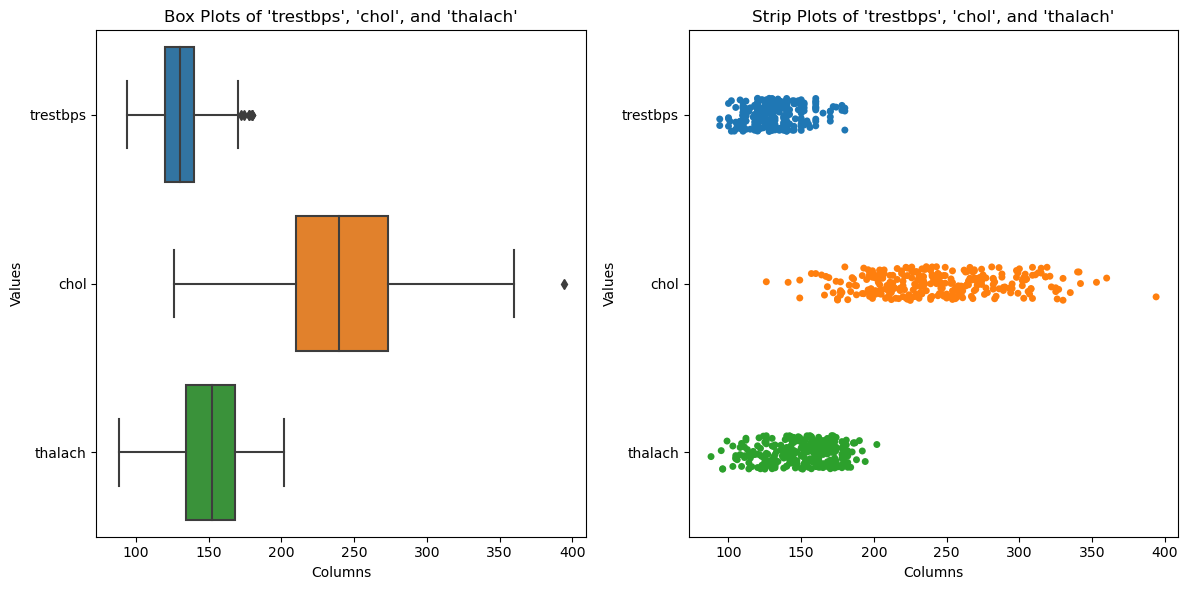

In [24]:
norm_upper_limit_trestbps = df["trestbps"].mean() + 3 * df["trestbps"].std()
norm_lower_limit_trestbps = df["trestbps"].mean() - 3 * df["trestbps"].std()

norm_upper_limit_chol = df["chol"].mean() + 3 * df["chol"].std()
norm_lower_limit_chol = df["chol"].mean() - 3 * df["chol"].std()

norm_upper_limit_thalach = df["thalach"].mean() + 3 * df["thalach"].std()
norm_lower_limit_thalach = df["thalach"].mean() - 3 * df["thalach"].std()

df_new = df[
    (df["trestbps"] > norm_lower_limit_trestbps) & (df["trestbps"] < norm_upper_limit_trestbps) &
    (df["chol"] > norm_lower_limit_chol) & (df["chol"] < norm_upper_limit_chol) &
    (df["thalach"] > norm_lower_limit_thalach) & (df["thalach"] < norm_upper_limit_thalach)
].copy()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df_new[['trestbps', 'chol', 'thalach']], orient='h')
plt.title("Box Plots of 'trestbps', 'chol', and 'thalach'")
plt.xlabel("Columns")
plt.ylabel("Values")

plt.subplot(1, 2, 2)
sns.stripplot(data=df_new[['trestbps', 'chol', 'thalach']], orient='h', jitter=True)
plt.title("Strip Plots of 'trestbps', 'chol', and 'thalach'")
plt.xlabel("Columns")
plt.ylabel("Values")

plt.tight_layout()
plt.show()


In [25]:
df_new.shape

(286, 15)

### Method 4: One Class SVM

The efficacy of One-Class SVM in accurately identifying outliers may not always be flawless, since its performance is contingent upon the specific attributes of the dataset and the parameters used.The topic of interest is unsupervised outlier detection.The objective is to approximate the level of support for a distribution in a high-dimensional space.


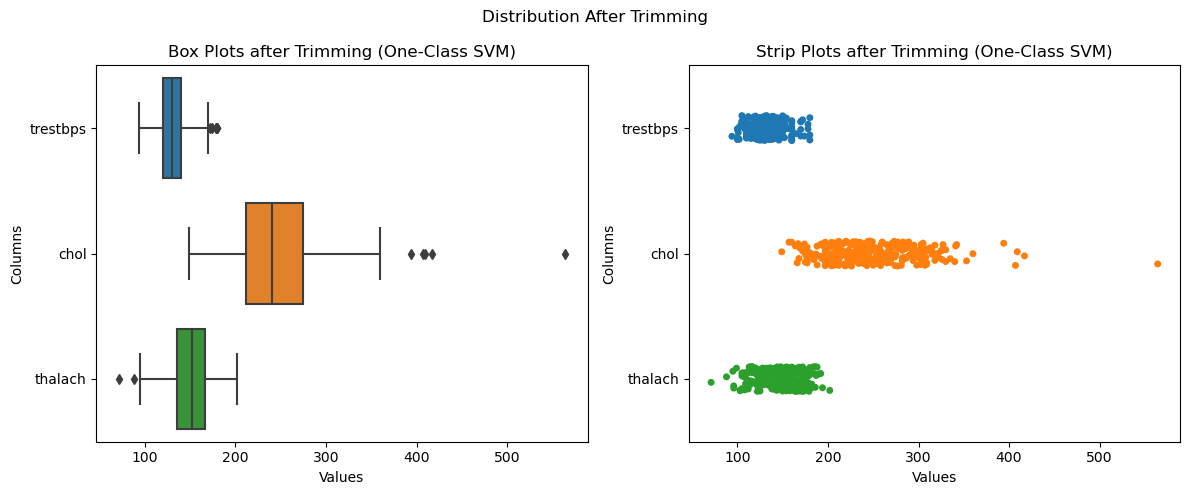

In [26]:
svm = OneClassSVM(nu=0.01)

df['outliers_svm'] = svm.fit_predict(df[['trestbps', 'chol', 'thalach']])

df_svm = df[df['outliers_svm'] != -1]

plt.figure(figsize=(12, 5))
plt.suptitle("Distribution After Trimming")

plt.subplot(1, 2, 1)
sns.boxplot(data=df_svm[['trestbps', 'chol', 'thalach']], orient='h')
plt.title("Box Plots after Trimming (One-Class SVM)")
plt.xlabel("Values")
plt.ylabel("Columns")

plt.subplot(1, 2, 2)
sns.stripplot(data=df_svm[['trestbps', 'chol', 'thalach']], orient='h', jitter=True)
plt.title("Strip Plots after Trimming (One-Class SVM)")
plt.xlabel("Values")
plt.ylabel("Columns")

plt.tight_layout()
plt.show()


In [27]:
df_svm.shape

(287, 16)

### Method 5: Elliptic Envelope Covariance Determinant

The Elliptic Envelope method is often applicable to datasets in which the underlying data distribution is considered to resemble a multivariate Gaussian (multivariate normal distribution). The underlying assumption of this approach is that the majority of the data points belong to the "inlier" category, which adheres to the Gaussian distribution. Outliers, on the other hand, are defined as data points that exhibit substantial deviation from this distribution.


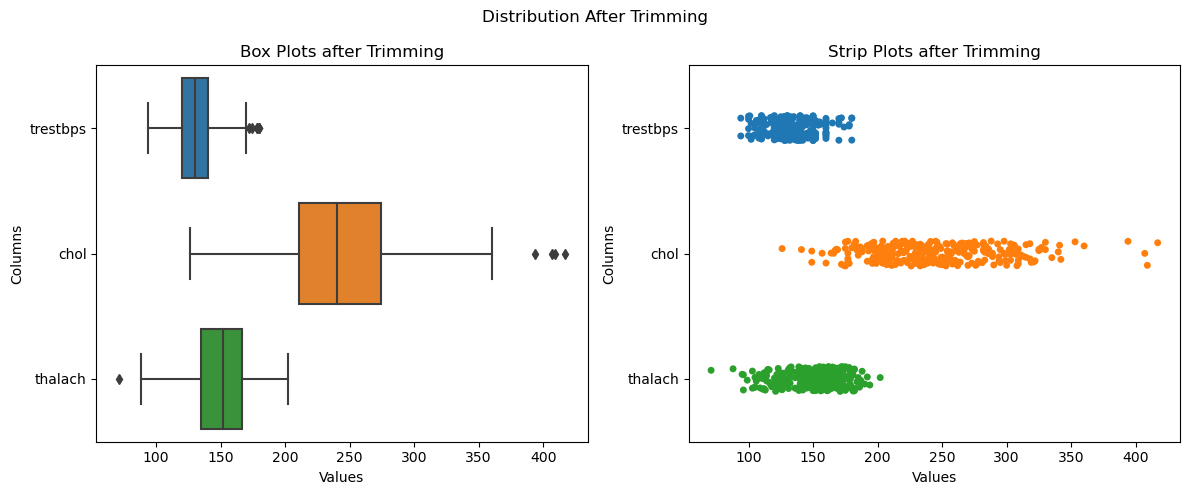

In [28]:
ee = EllipticEnvelope(contamination=0.01)

df['outliers_eliptic'] = ee.fit_predict(df[['trestbps', 'chol', 'thalach']])

df_elic = df[df['outliers_eliptic'] != -1]

plt.figure(figsize=(12, 5))
plt.suptitle("Distribution After Trimming")

plt.subplot(1, 2, 1)
sns.boxplot(data=df_elic[['trestbps', 'chol', 'thalach']], orient='h')
plt.title("Box Plots after Trimming")
plt.xlabel("Values")
plt.ylabel("Columns")

plt.subplot(1, 2, 2)
sns.stripplot(data=df_elic[['trestbps', 'chol', 'thalach']], orient='h', jitter=True)
plt.title("Strip Plots after Trimming")
plt.xlabel("Values")
plt.ylabel("Columns")

plt.tight_layout()
plt.show()


In [29]:
df_elic.shape

(290, 17)

### Method 6: Local Outlier Factor

In contrast to approaches that make the assumption of a Gaussian distribution, the Local Outlier Factor (LOF) technique exhibits more resilience when dealing with data distributions that deviate from pure Gaussianity.It is essential to acknowledge that the Local Outlier Factor (LOF) is used not for the purpose of eliminating outliers, but rather for their detection and identification. The algorithm computes a "local outlier factor" score for each data point, which quantifies the extent to which it diverges from its neighbouring points. 


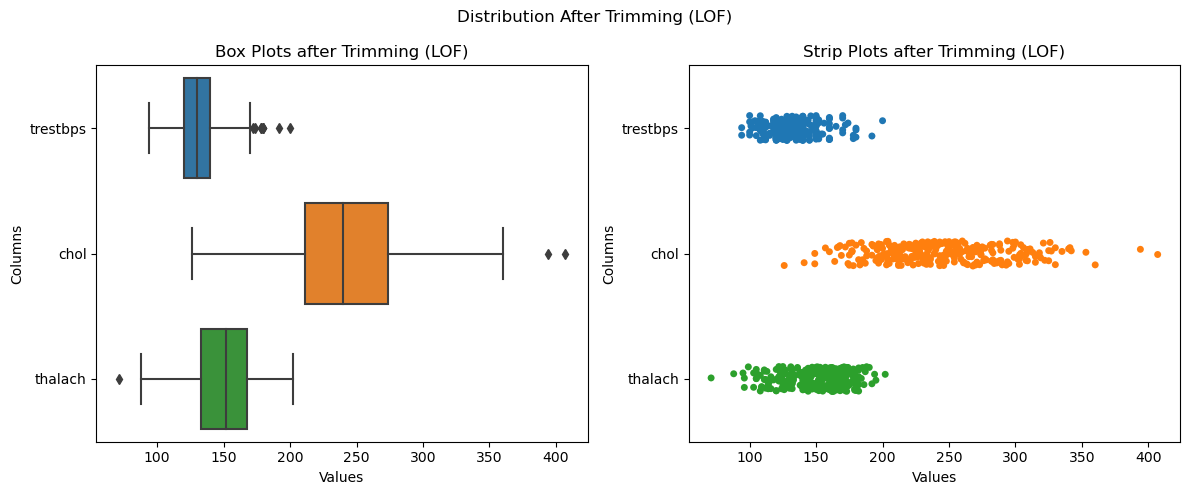

In [30]:
lof = LocalOutlierFactor(contamination=0.01)

df['outliers_lof'] = lof.fit_predict(df[['trestbps', 'chol', 'thalach']])

df_lof = df[df['outliers_lof'] != -1]

plt.figure(figsize=(12, 5))
plt.suptitle("Distribution After Trimming (LOF)")

plt.subplot(1, 2, 1)
sns.boxplot(data=df_lof[['trestbps', 'chol', 'thalach']], orient='h')
plt.title("Box Plots after Trimming (LOF)")
plt.xlabel("Values")
plt.ylabel("Columns")

plt.subplot(1, 2, 2)
sns.stripplot(data=df_lof[['trestbps', 'chol', 'thalach']], orient='h', jitter=True)
plt.title("Strip Plots after Trimming (LOF)")
plt.xlabel("Values")
plt.ylabel("Columns")

plt.tight_layout()
plt.show()


In [31]:
df_lof.shape

(290, 18)

### Method 7:  Z-Score

While the Z-Score method is generally effective in identifying and eliminating outliers, its applicability is limited to certain types of data. The statement implies that this particular approach is applicable just to datasets that exhibit a normal distribution or are in close proximity to it. Consequently, it is not suitable for skewed data, whether it is left-skewed or right-skewed. 

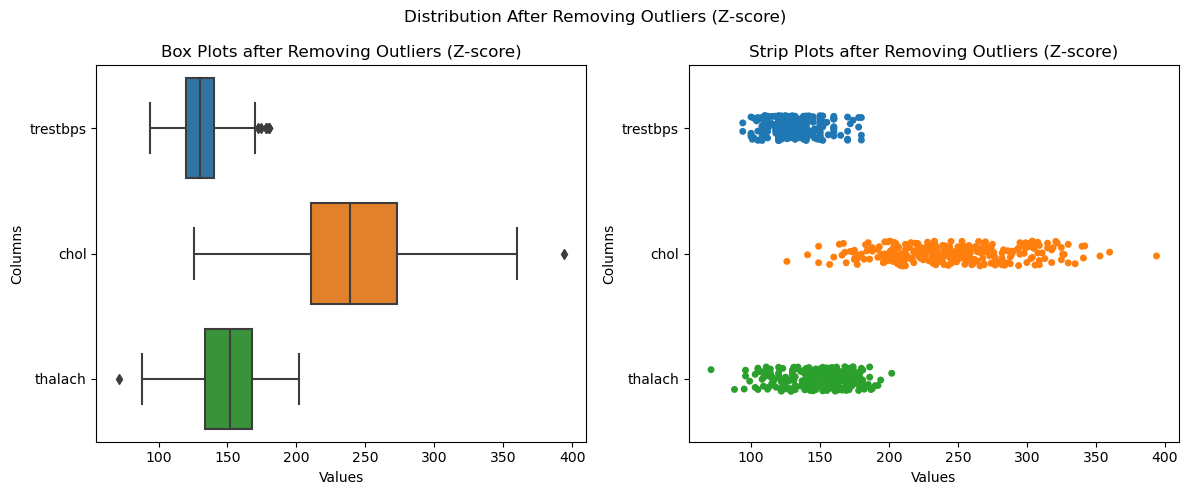

In [32]:
columns_to_check = ['trestbps', 'chol', 'thalach']

z_scores = zscore(df[columns_to_check])

z_threshold = 3 

outliers_mask = (z_scores > z_threshold).any(axis=1)

df_zscore = df[~outliers_mask]

plt.figure(figsize=(12, 5))
plt.suptitle("Distribution After Removing Outliers (Z-score)")

plt.subplot(1, 2, 1)
sns.boxplot(data=df_zscore[columns_to_check], orient='h')
plt.title("Box Plots after Removing Outliers (Z-score)")
plt.xlabel("Values")
plt.ylabel("Columns")

plt.subplot(1, 2, 2)
sns.stripplot(data=df_zscore[columns_to_check], orient='h', jitter=True)
plt.title("Strip Plots after Removing Outliers (Z-score)")
plt.xlabel("Values")
plt.ylabel("Columns")

plt.tight_layout()
plt.show()


In [33]:
df_zscore.shape

(287, 18)

## Conclusion

Selecting an appropriate method depends on the nature of the dataset and the analytical goals. However, it is crucial to exercise caution – while outliers might be anomalies, they could also be valuable insights or genuine observations. Hence, handling outliers should be guided by domain knowledge, data context, and a clear understanding of the potential impact on analysis outcomes.